# Embeddings  Clustering

Embeddings model: BERT

Category: types of news categories

#### Setup

In [1]:
#!pip install wordcloud Levenshtein

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
import Levenshtein as lev
from src.utils import testing_best_kmeans_clustering
from sklearn.metrics import silhouette_samples
from src.eda import (plot_silhouette_scores, plot_word_cloud, 
                     most_common_word, generate_words_frequency, 
                     plot_silhouette_scores, plot_clusters_distribution)

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
pd.set_option('max_colwidth', 1000)
SEED=42
notebook_start_time = time.time()

### Data Acces

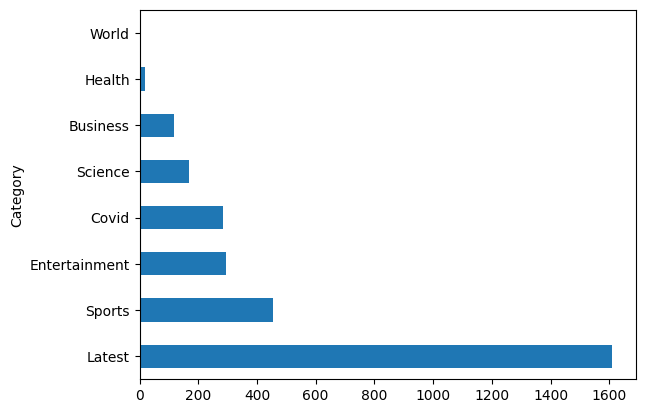

In [2]:
# processed data from Embeddings/hugging_face_bert.ipynb
dataframe = pd.read_parquet('../Datasets/pre_processed_dataframes/embeddings_df.parquet')
dataframe = dataframe[dataframe['language_name'] == 'English'].copy()
ax = dataframe['Category'].value_counts().plot(kind='barh')

In [3]:
dataframe = dataframe[dataframe['Category'] == 'Latest'].copy()

### Finding best values for Perplexity and Cluster

In [4]:
unique_categories = dataframe['Category'].unique()
category_colors = []
if len(unique_categories) > 1:
    colors = sea.color_palette('hsv', len(unique_categories))
    color_dict = dict(zip(unique_categories, colors))
    category_colors = dataframe['Category'].map(color_dict)

TSNE perplexity =  6
For n_clusters = 3 The average silhouette_score is : 0.41258454
For n_clusters = 4 The average silhouette_score is : 0.4165947
For n_clusters = 5 The average silhouette_score is : 0.38954163
For n_clusters = 6 The average silhouette_score is : 0.38461727
For n_clusters = 7 The average silhouette_score is : 0.39755508
For n_clusters = 8 The average silhouette_score is : 0.3871927
For n_clusters = 9 The average silhouette_score is : 0.38456067


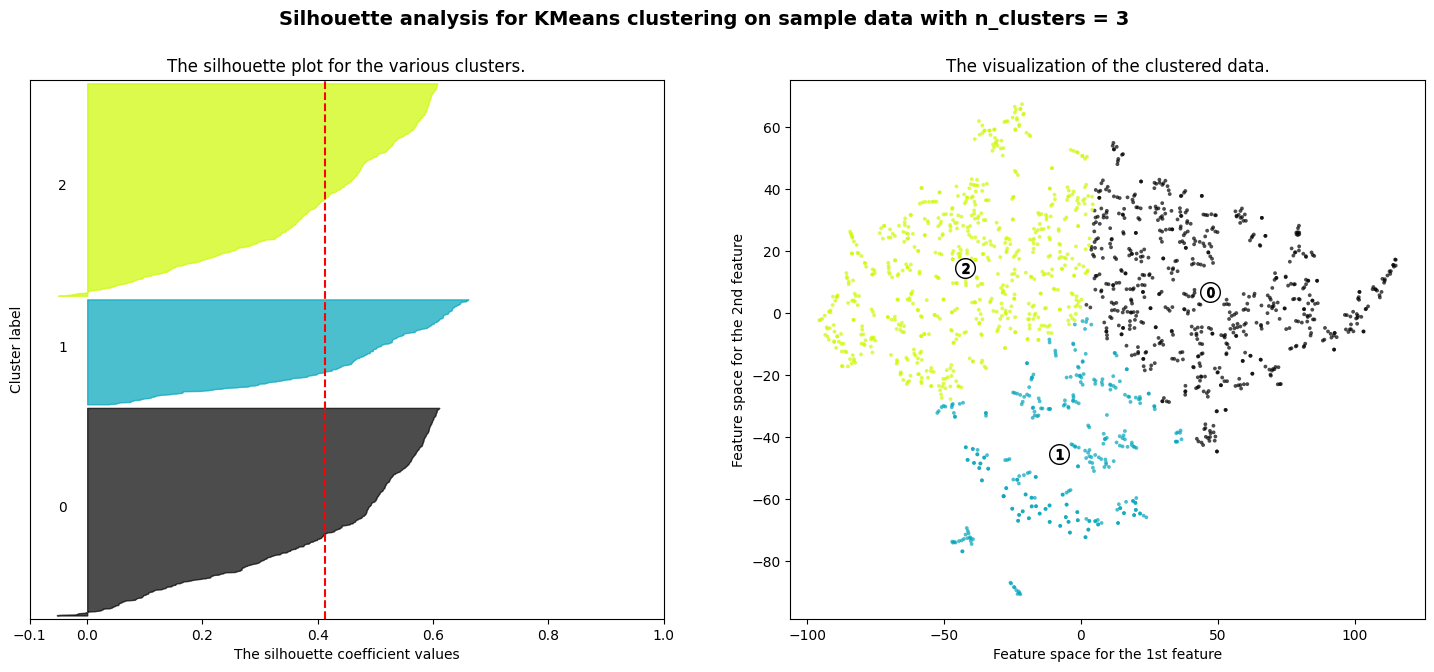

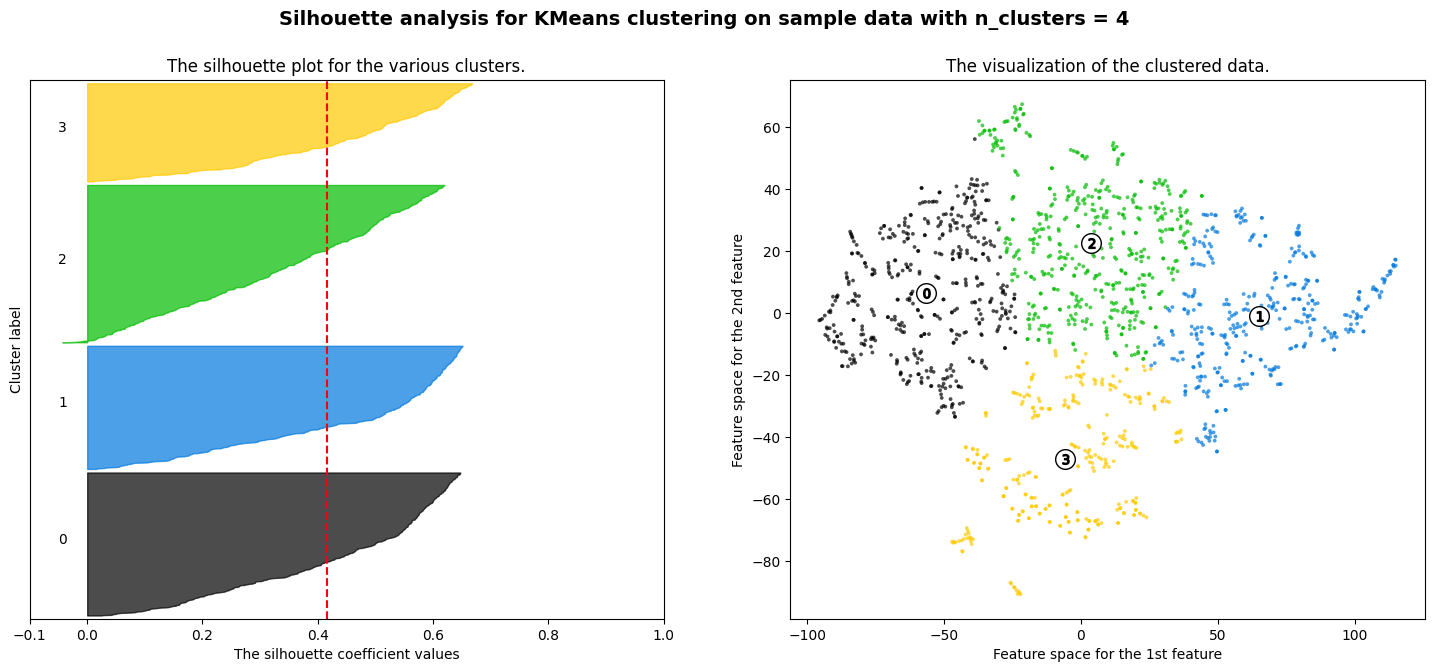

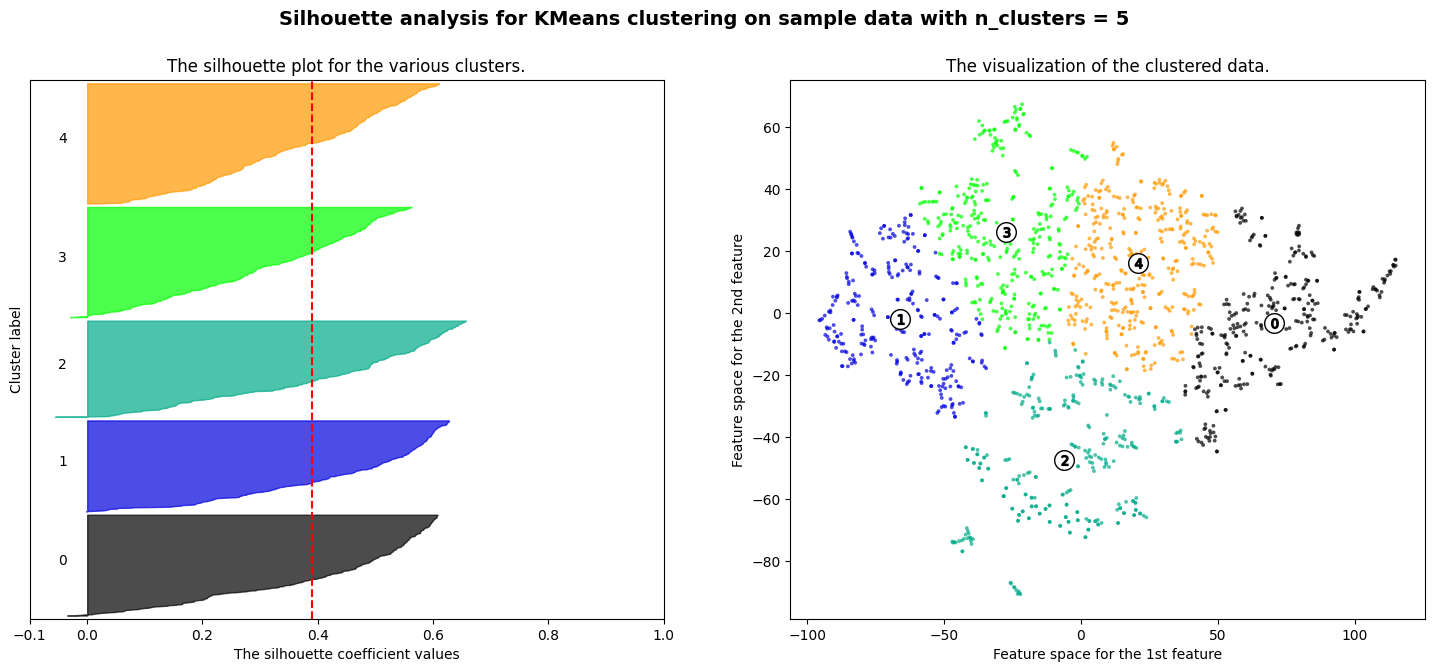

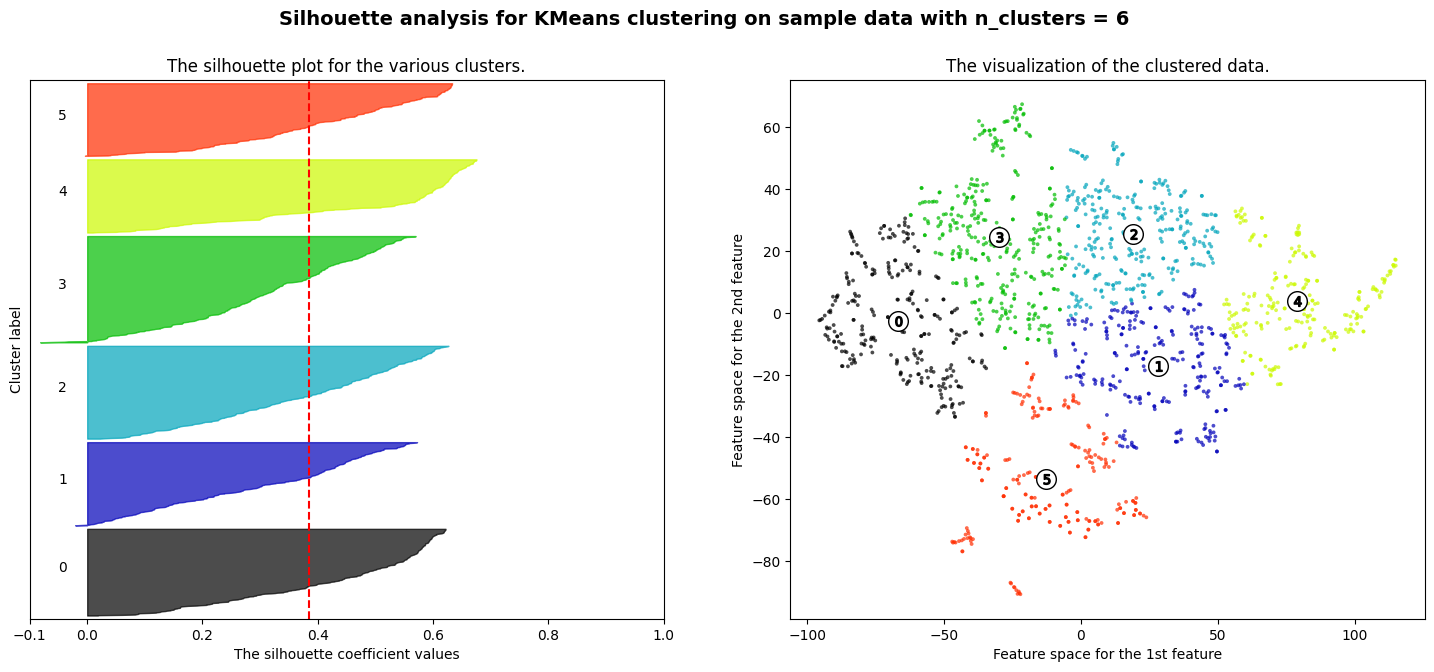

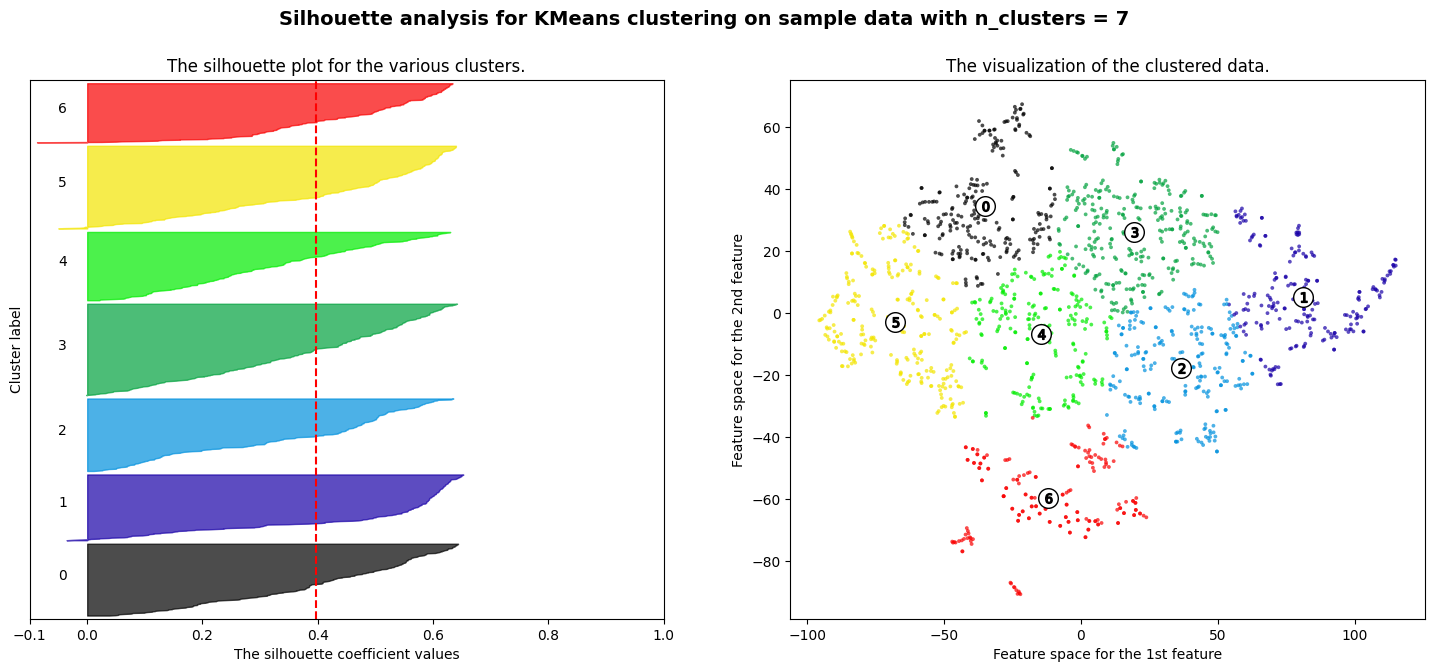

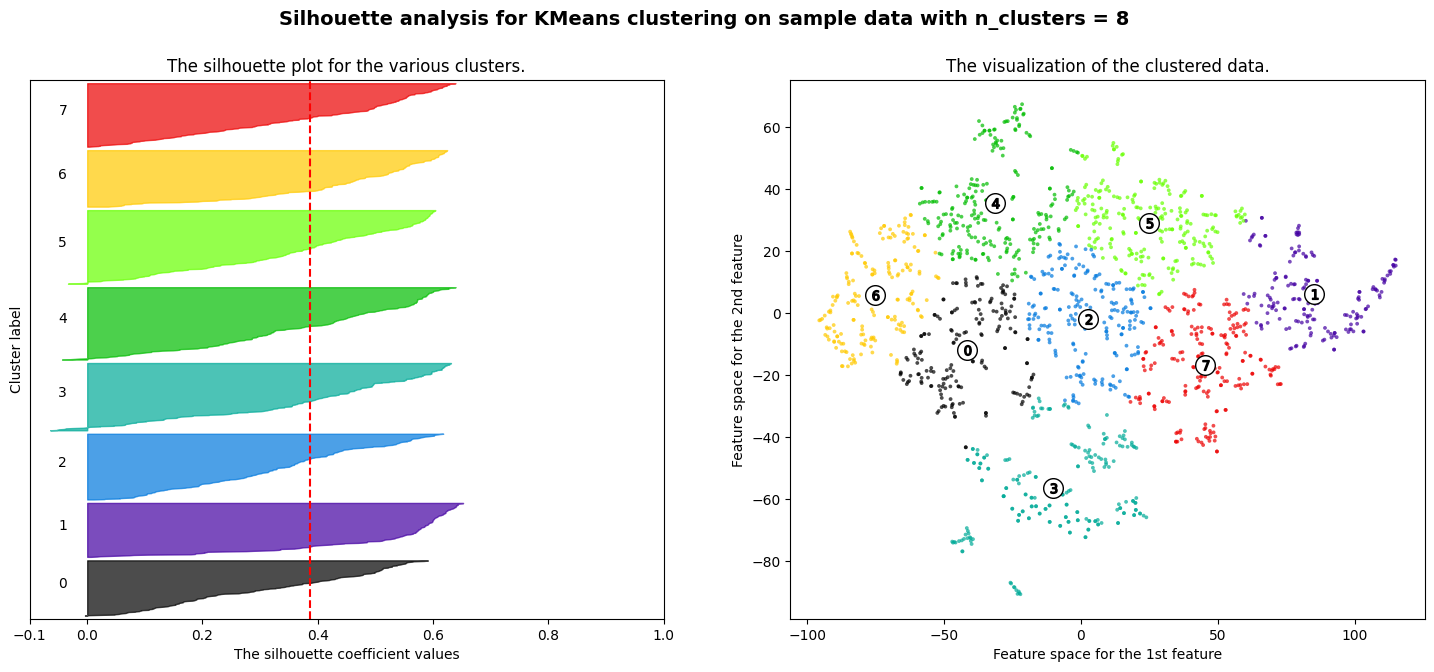

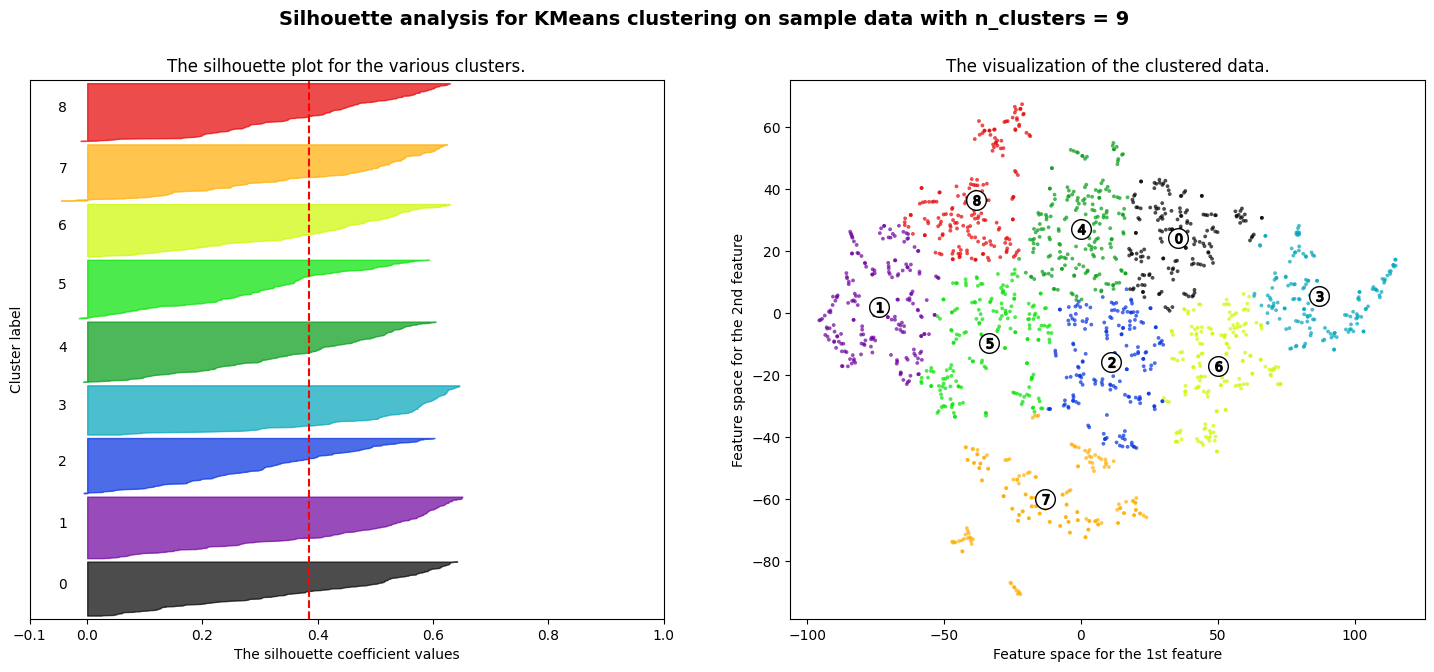

TSNE/KMeans execution time = 0.03383333333333333 (minutes)
__________________________________________________________________________

TSNE perplexity =  8
For n_clusters = 3 The average silhouette_score is : 0.41412967
For n_clusters = 4 The average silhouette_score is : 0.43082225
For n_clusters = 5 The average silhouette_score is : 0.40485024
For n_clusters = 6 The average silhouette_score is : 0.3978875
For n_clusters = 7 The average silhouette_score is : 0.40563866
For n_clusters = 8 The average silhouette_score is : 0.39117792
For n_clusters = 9 The average silhouette_score is : 0.38128826


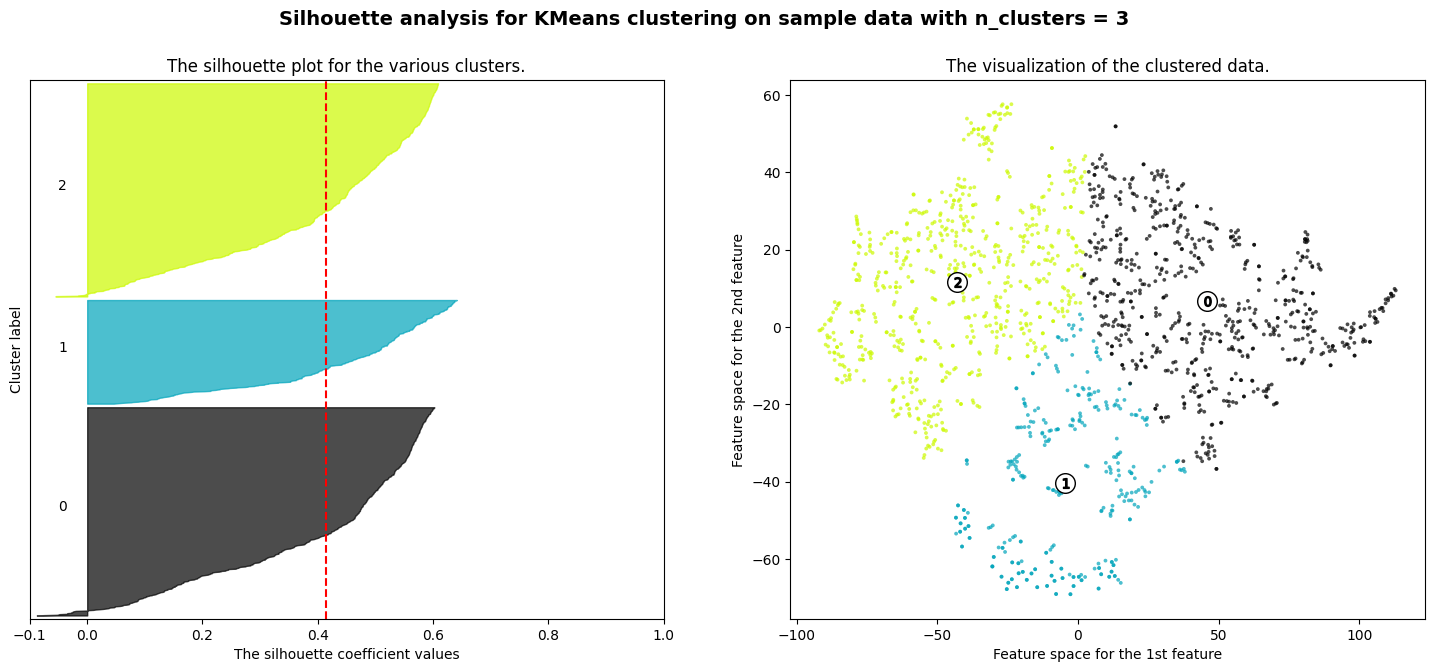

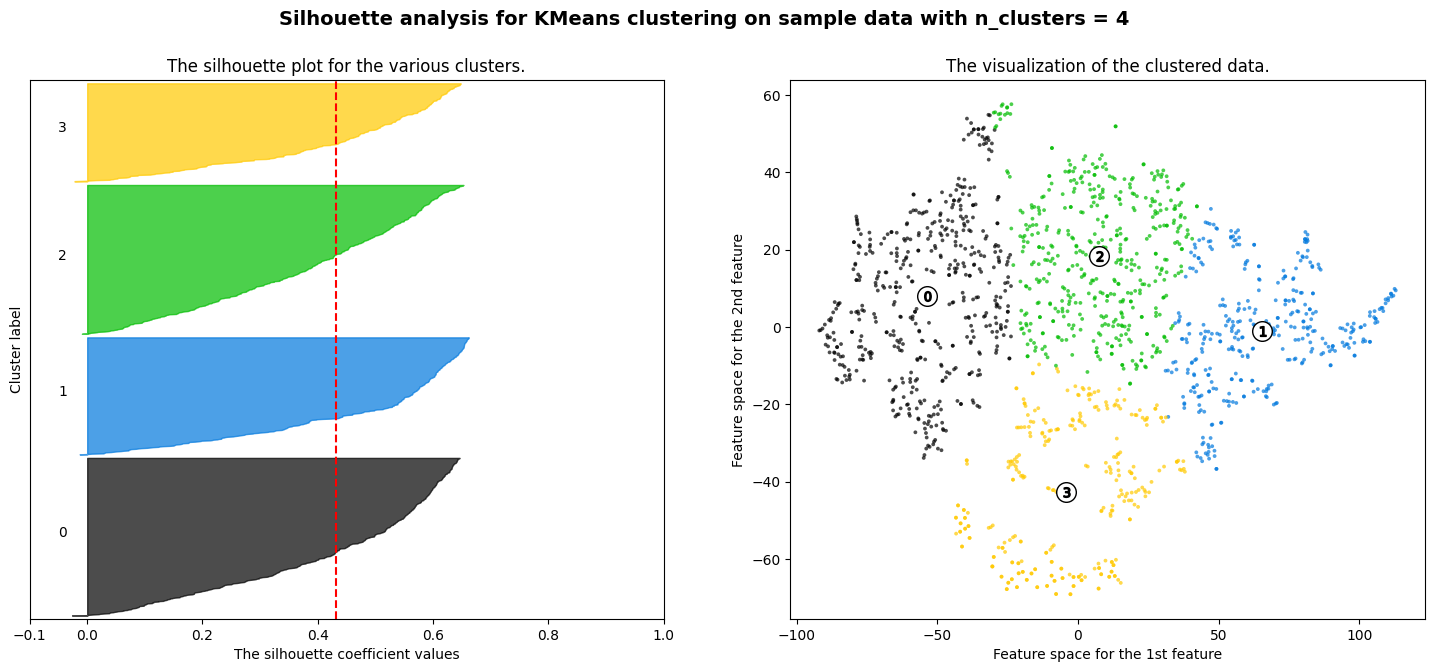

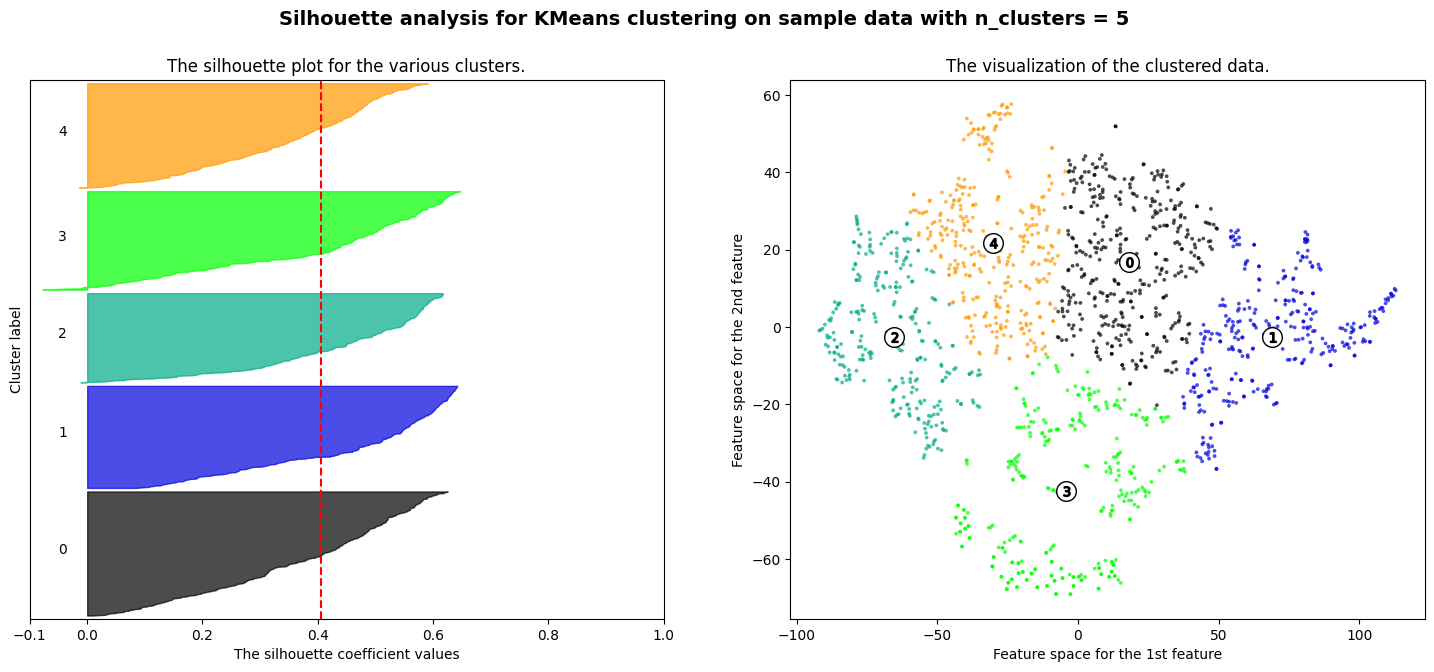

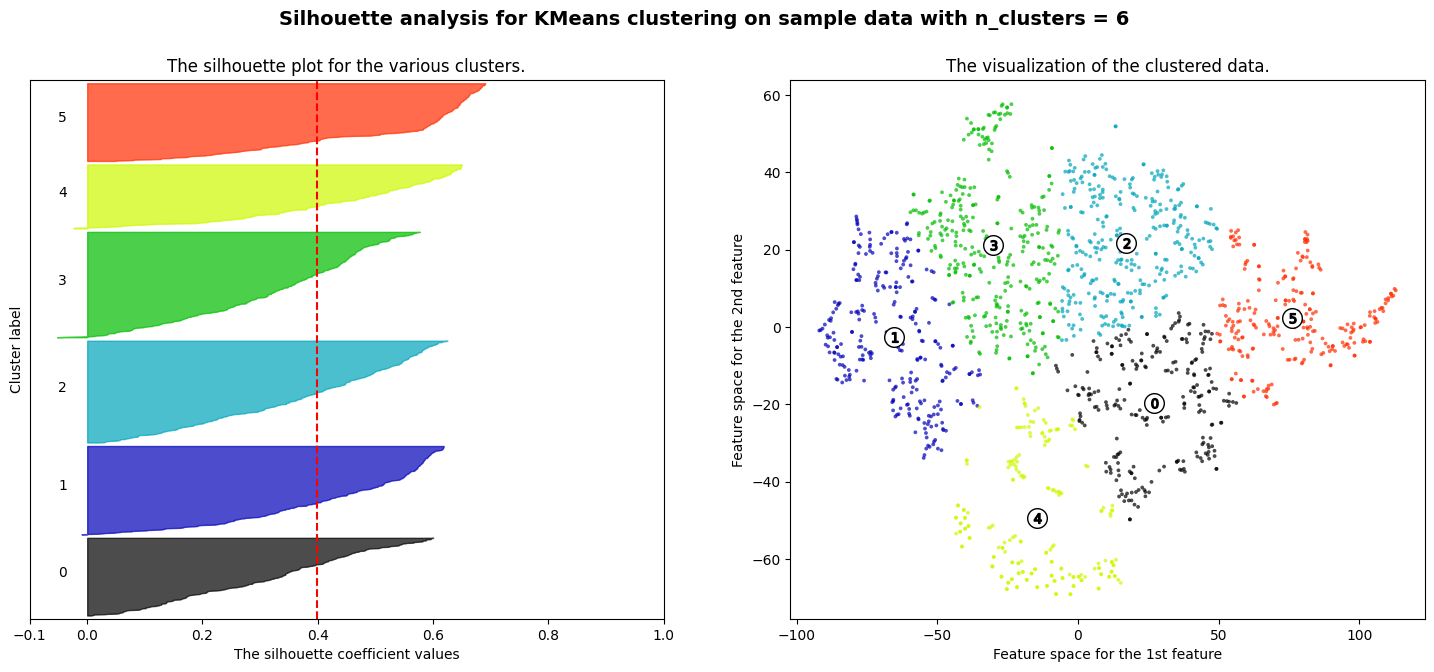

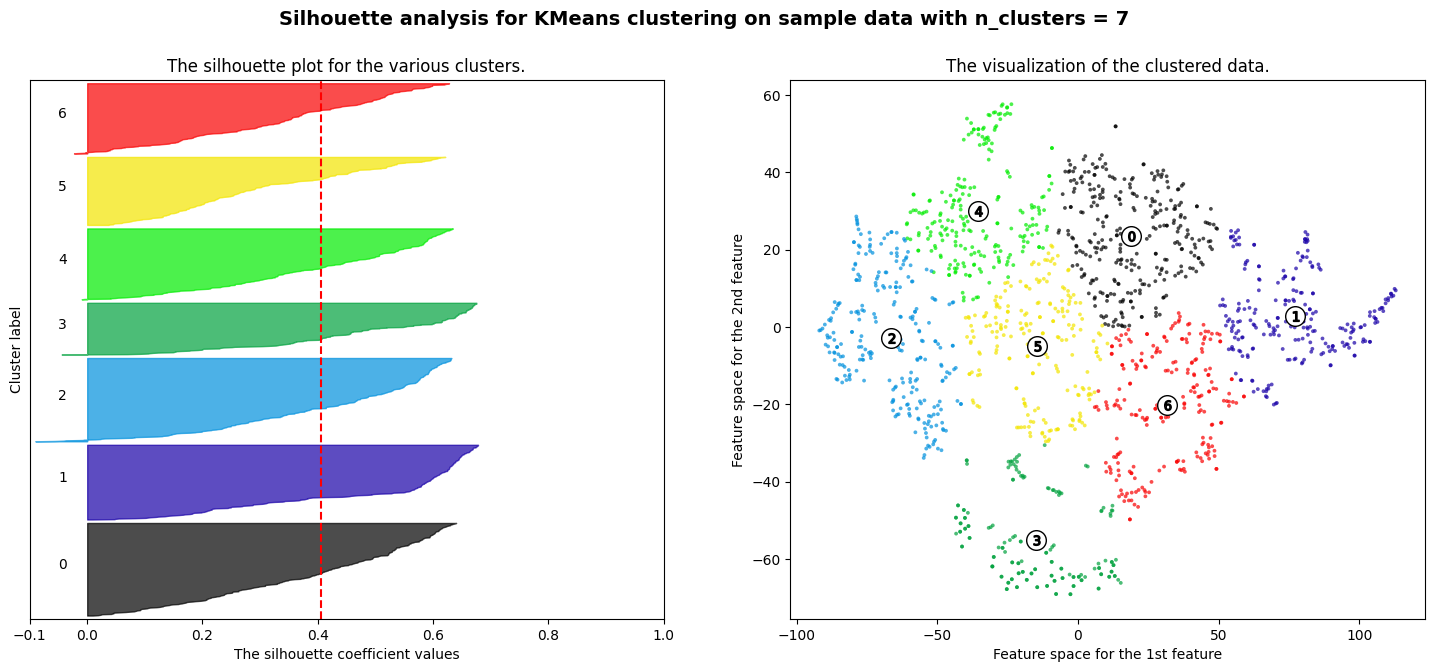

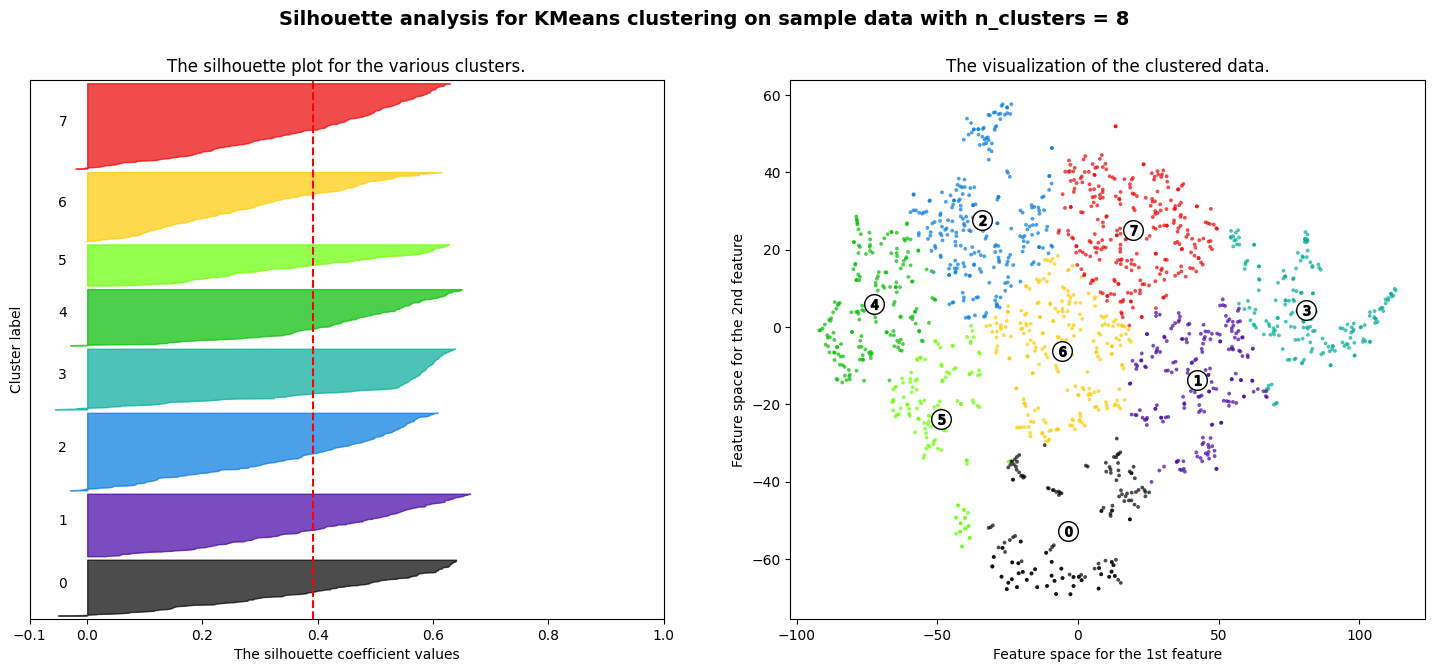

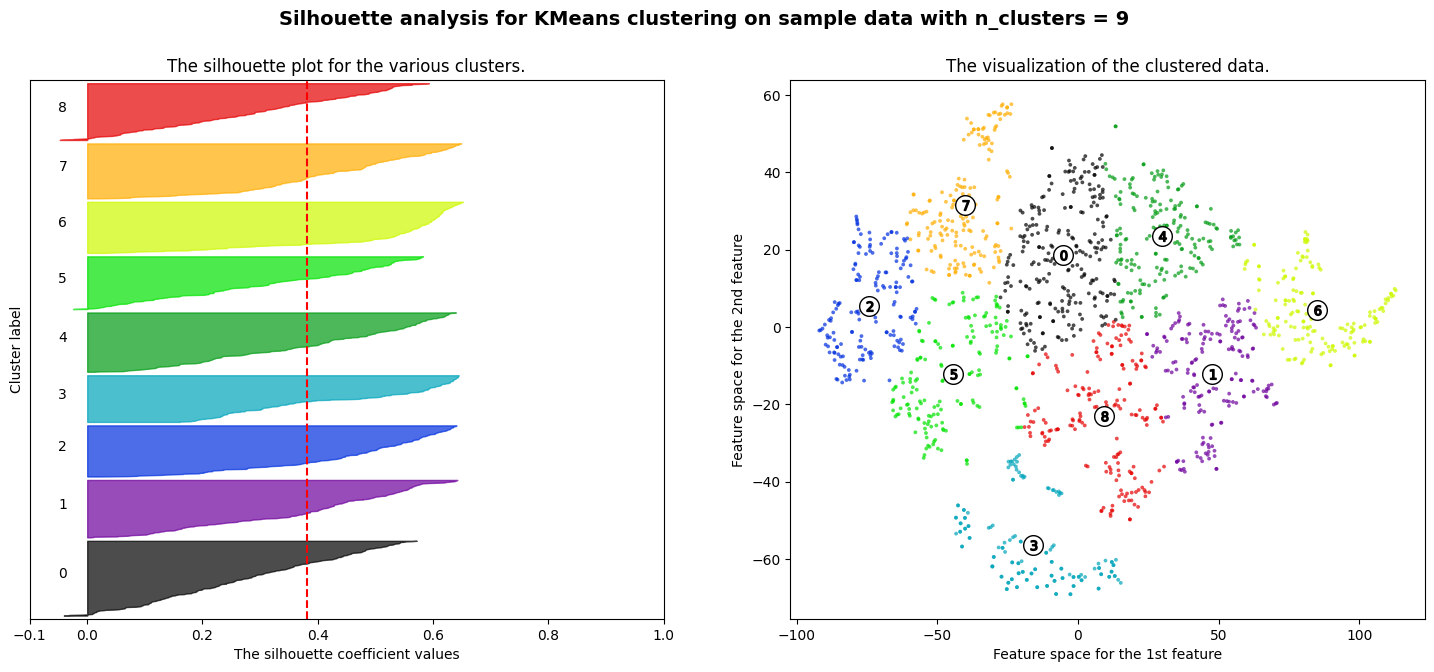

TSNE/KMeans execution time = 0.035833333333333335 (minutes)
__________________________________________________________________________

TSNE perplexity =  10
For n_clusters = 3 The average silhouette_score is : 0.38357875
For n_clusters = 4 The average silhouette_score is : 0.43268576
For n_clusters = 5 The average silhouette_score is : 0.40543818
For n_clusters = 6 The average silhouette_score is : 0.39297855
For n_clusters = 7 The average silhouette_score is : 0.38142088
For n_clusters = 8 The average silhouette_score is : 0.38737345
For n_clusters = 9 The average silhouette_score is : 0.38312277


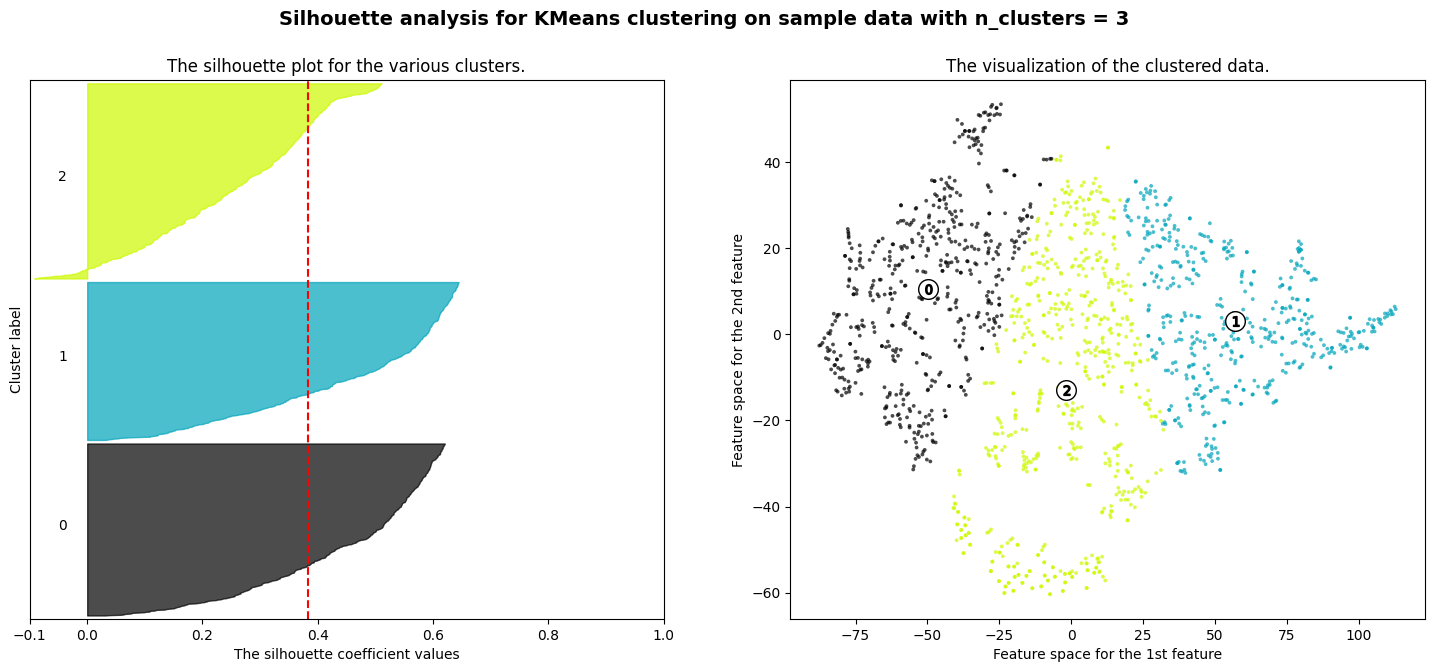

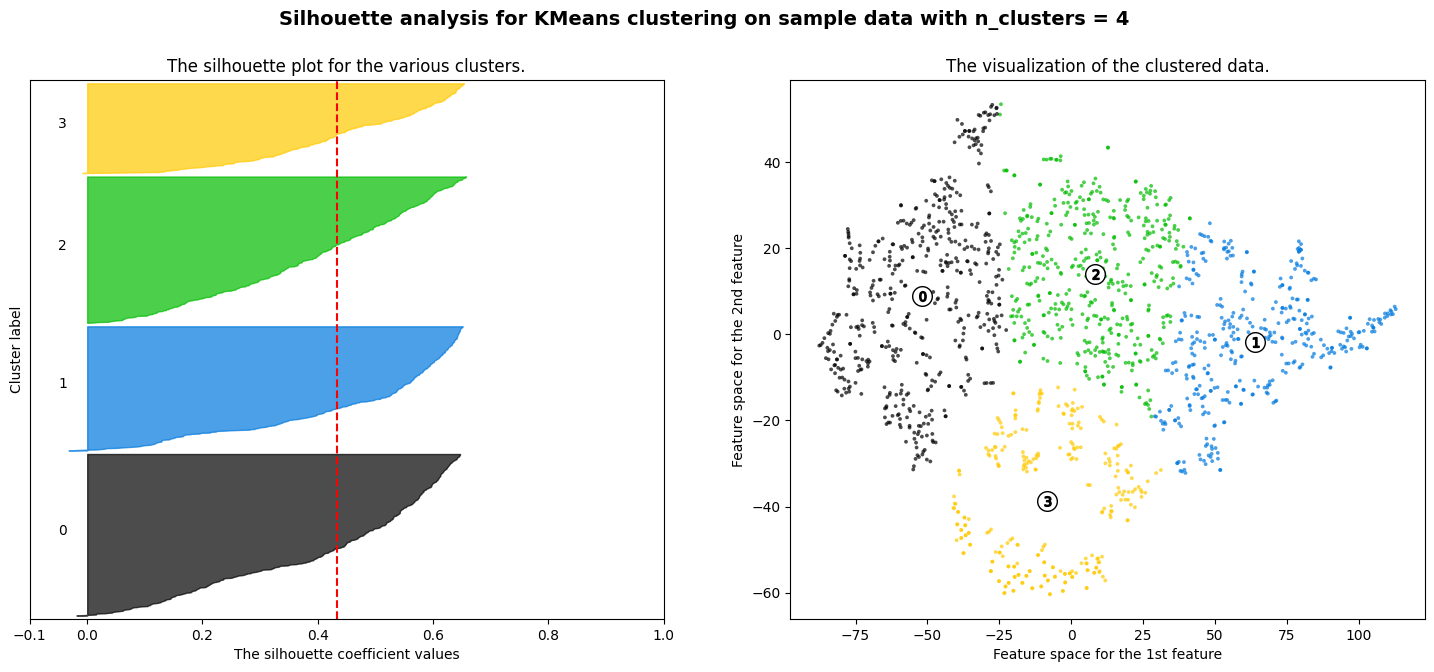

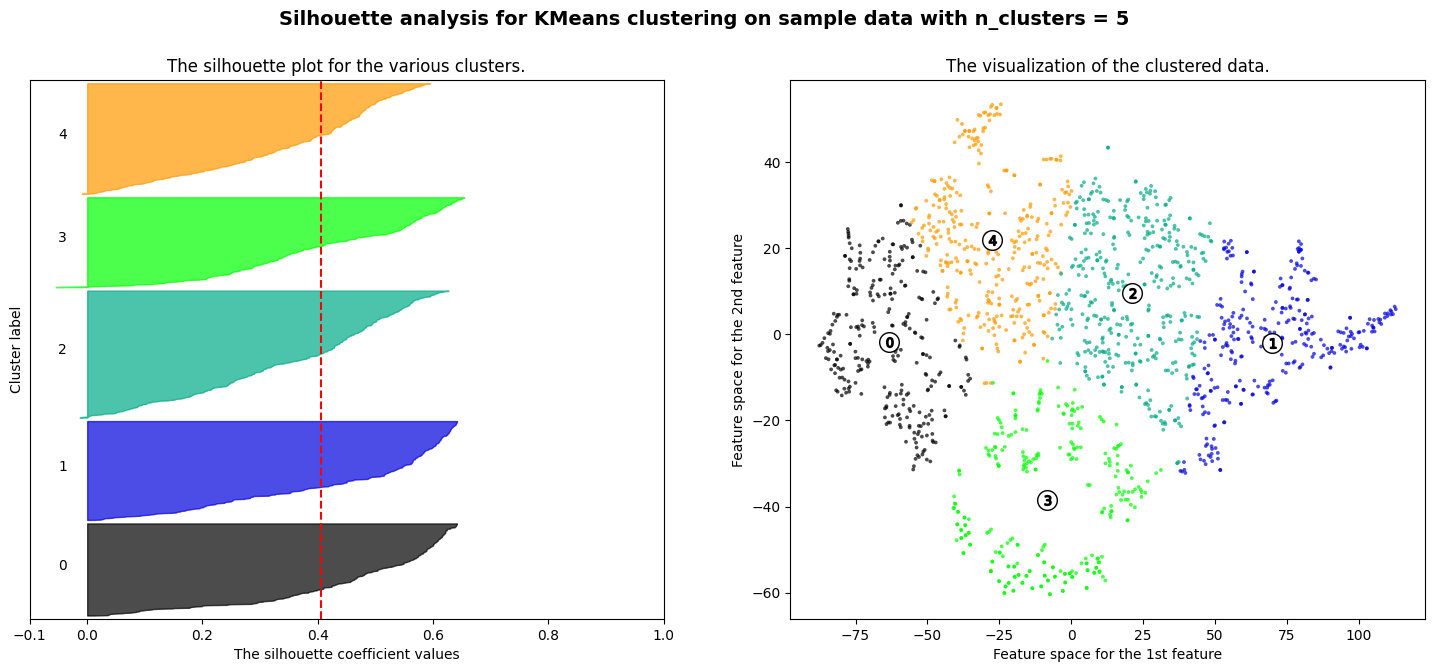

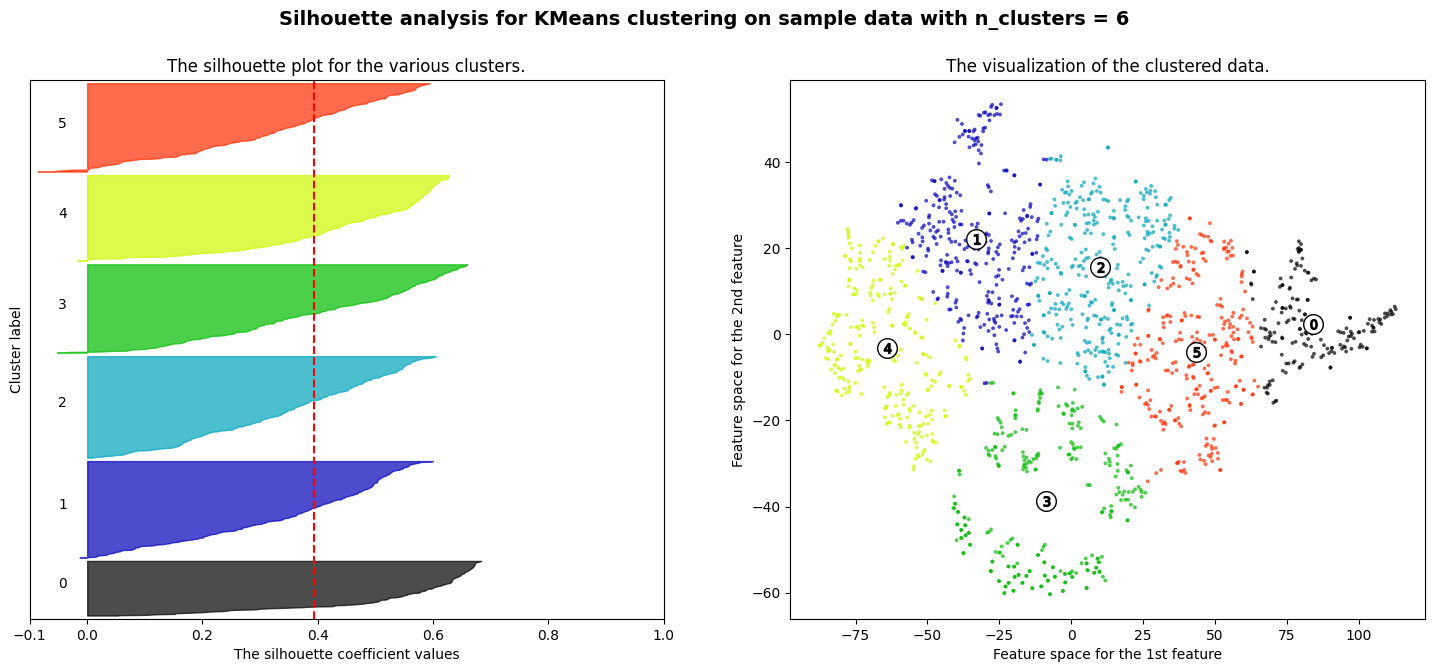

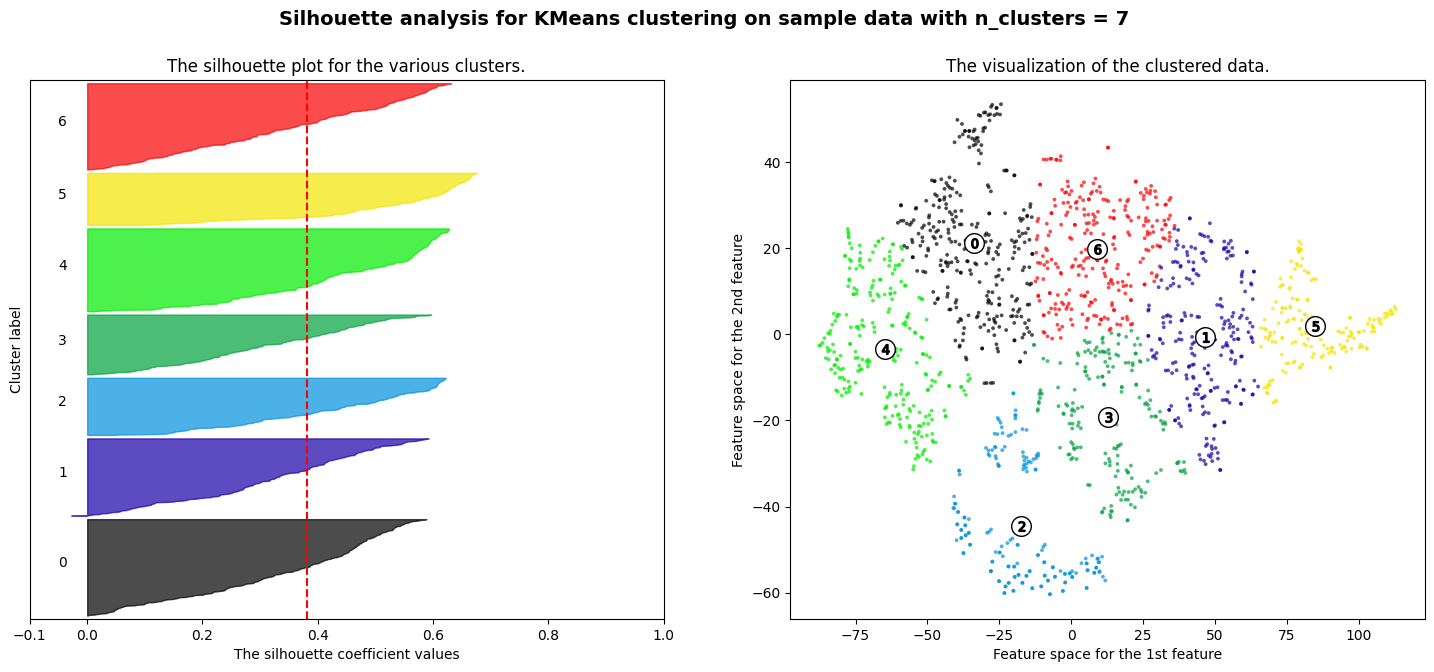

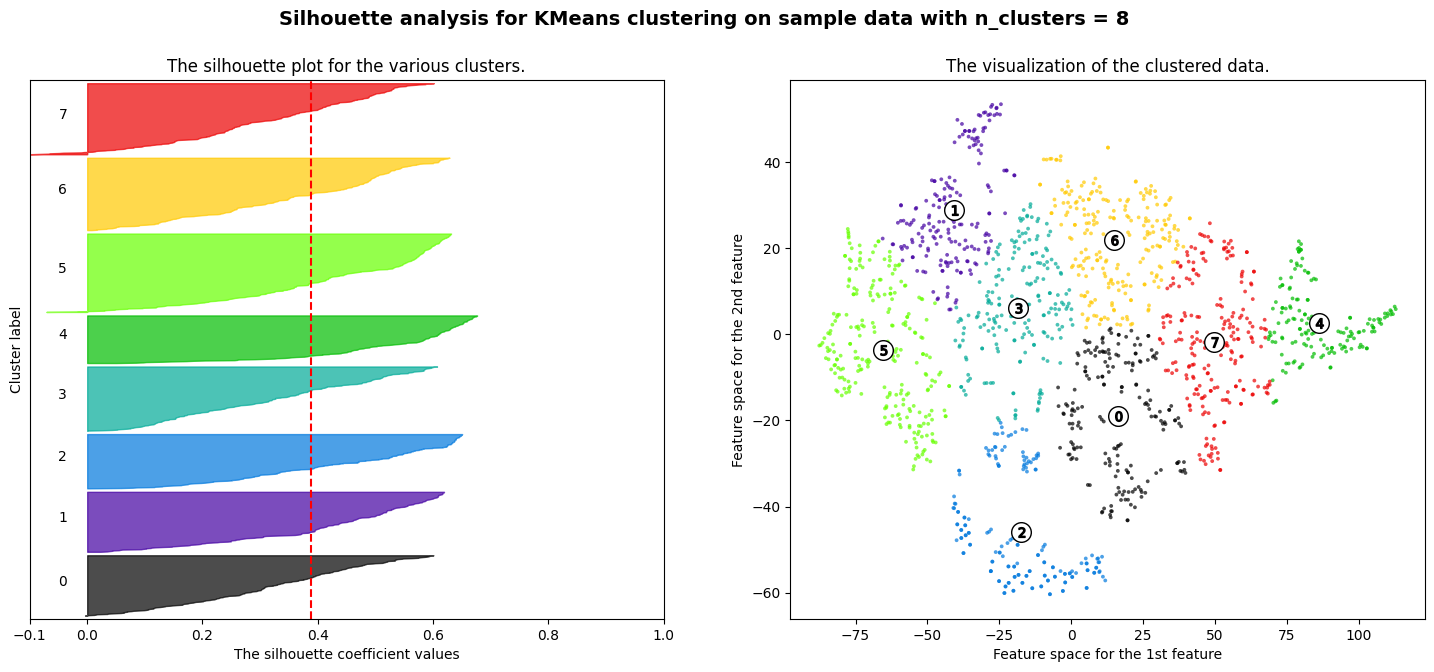

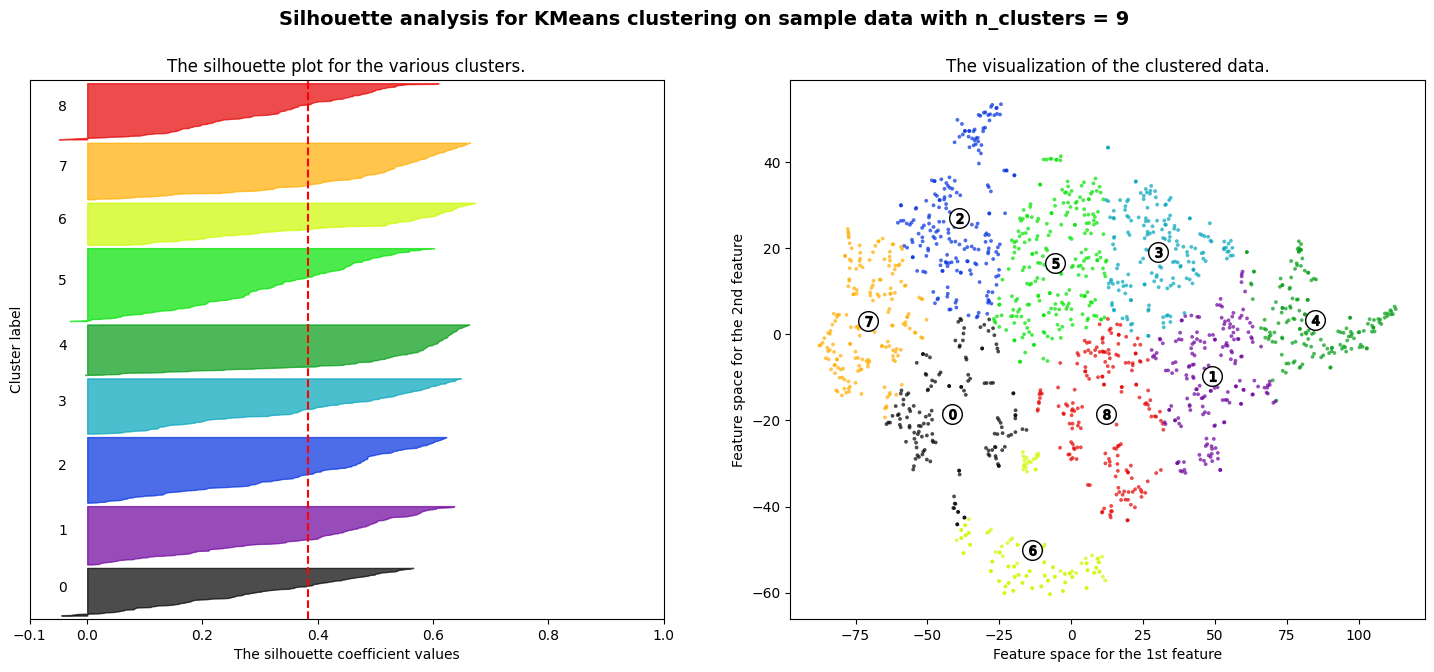

TSNE/KMeans execution time = 0.03933333333333333 (minutes)
__________________________________________________________________________



In [5]:
X = np.vstack(dataframe['embeddings_description'].values)
range_n_cluster = 10
perplexity_silhouette = {}
max_best_cluster = 0

for perplexity in np.arange(6, 12, step=2):
    print('TSNE perplexity = ', perplexity)
    start_time = time.time()
    tsne = TSNE(n_components=2, 
                random_state=42, 
                metric='cosine',            
                verbose=False,                                
                perplexity=perplexity)

    X_tsne = tsne.fit_transform(X)

    end_time = time.time()    
    best_silhouette_scores = testing_best_kmeans_clustering(range_n_cluster, X_tsne)
         
    best_cluster = max(best_silhouette_scores, key=best_silhouette_scores.get)

    if best_cluster > max_best_cluster:        
        perplexity_silhouette['perplexity']= perplexity
        perplexity_silhouette['scores'] = best_silhouette_scores
        perplexity_silhouette['best_cluster'] = best_cluster

    tsne_elapsed_time = np.round(end_time - start_time, 2)/60
    print(f'TSNE/KMeans execution time = {tsne_elapsed_time} (minutes)')
    print('__________________________________________________________________________\n')

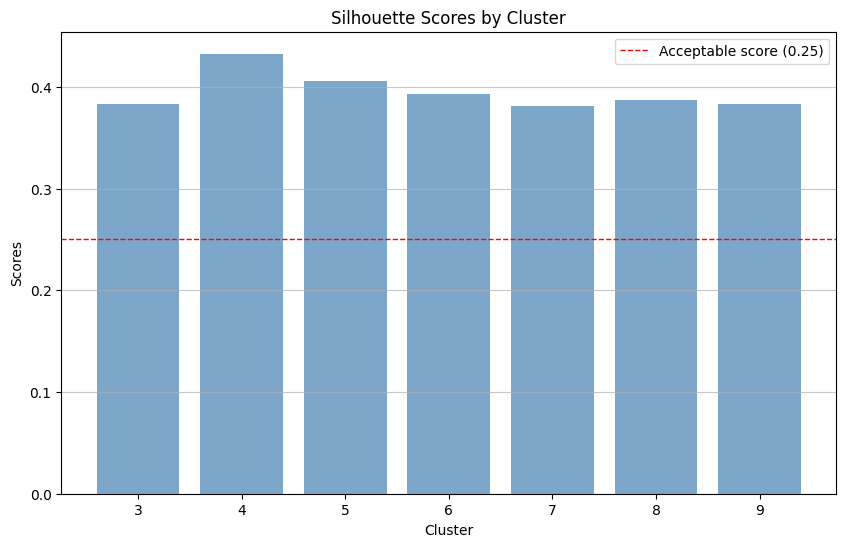

In [6]:
plot_silhouette_scores(perplexity_silhouette)

In [7]:
best_cluster = perplexity_silhouette['best_cluster']
best_perplexity = perplexity_silhouette['perplexity']

best_cluster, best_perplexity

(4, 10)

### KMeans and TSNE

In [8]:
tsne = TSNE(n_components=2, 
            random_state=42, 
            metric='cosine',            
            verbose=False,                                
            perplexity=best_perplexity)

X_tsne = tsne.fit_transform(X)

clusterer = KMeans(n_clusters=best_cluster, 
                    random_state=42,
                    max_iter=500)
labels = clusterer.fit_predict(X_tsne)

### Silhouette Scores por Sample

In [9]:
silhouette_scores = silhouette_samples(X_tsne, labels)

In [10]:
silhouette_scores_list = []
for i in range(len(X_tsne)):
    silhouette_scores_list.append(silhouette_scores[i])

In [11]:
for i in range(len(X_tsne)):
    if silhouette_scores[i] > 0.65:
        print(f"Sample {i}: Silhouette Score = {silhouette_scores[i]}")

Sample 54: Silhouette Score = 0.6520975828170776
Sample 115: Silhouette Score = 0.6511082649230957
Sample 125: Silhouette Score = 0.6536359190940857
Sample 235: Silhouette Score = 0.6503145694732666
Sample 308: Silhouette Score = 0.6508206725120544
Sample 365: Silhouette Score = 0.6507118344306946
Sample 393: Silhouette Score = 0.6558118462562561
Sample 394: Silhouette Score = 0.6558118462562561
Sample 440: Silhouette Score = 0.651424765586853
Sample 468: Silhouette Score = 0.6566107273101807
Sample 634: Silhouette Score = 0.6573576331138611
Sample 660: Silhouette Score = 0.6501606106758118
Sample 792: Silhouette Score = 0.6504460573196411
Sample 854: Silhouette Score = 0.6507406234741211
Sample 1077: Silhouette Score = 0.6511078476905823
Sample 1230: Silhouette Score = 0.6514074802398682
Sample 1241: Silhouette Score = 0.6546334624290466
Sample 1268: Silhouette Score = 0.6510366201400757
Sample 1293: Silhouette Score = 0.6536360383033752
Sample 1511: Silhouette Score = 0.6524937748908

In [12]:
for i in range(len(X_tsne)):
    if silhouette_scores[i] < 0:
        print(f"Sample {i}: Silhouette Score = {silhouette_scores[i]}")

Sample 328: Silhouette Score = -0.03238904848694801
Sample 629: Silhouette Score = -0.020925670862197876
Sample 859: Silhouette Score = -0.004728519823402166
Sample 890: Silhouette Score = -0.008300183340907097
Sample 1162: Silhouette Score = -0.007264988496899605
Sample 1310: Silhouette Score = -0.018668213859200478


### Silhouette Scores by Cluster

In [13]:
cluster_silhouette_scores = {}
for cluster_label in set(labels):    
    examples_in_cluster = silhouette_scores[labels == cluster_label]    
    cluster_score = np.mean(examples_in_cluster)         
    cluster_silhouette_scores[cluster_label] = cluster_score        

In [14]:
dataframe['cluster'] = labels
dataframe['silhouette_sample'] = silhouette_scores_list
dataframe['cluster_silhouette_scores'] = dataframe['cluster'].apply(lambda x: cluster_silhouette_scores[x])

In [15]:
dataframe[['title', 'cluster', 'silhouette_sample', 'cluster_silhouette_scores', 'Category']].sample(5)

title  \
1613  Selma Blair's son helped shave her head ahead of her stem-cell transplant in one of the most emotional scenes in 'Introducing, Selma Blair'   
1907                                                                         Tata Punch Vs Mahindra KUV100 NXT Vs Maruti Ignis – Specs Comparison   
1178                                                                 Student who collapsed on night out ‘terrified’ club spiker will attack again   
1054                                                                                                               Apple AirPods (3rd Generation)   
514                                                                                                 Forde-Yard Dash: All Eyes On the Big Ten East   

      cluster  silhouette_sample  cluster_silhouette_scores Category  
1613        0           0.075455                   0.423922   Latest  
1907        3           0.560569                   0.456916   Latest  
1178        2           0.249467                   0.398241   Latest  
1054        1           0.624931                   0.467118   Latest  
514         1           0.166411                   0.467118   Latest

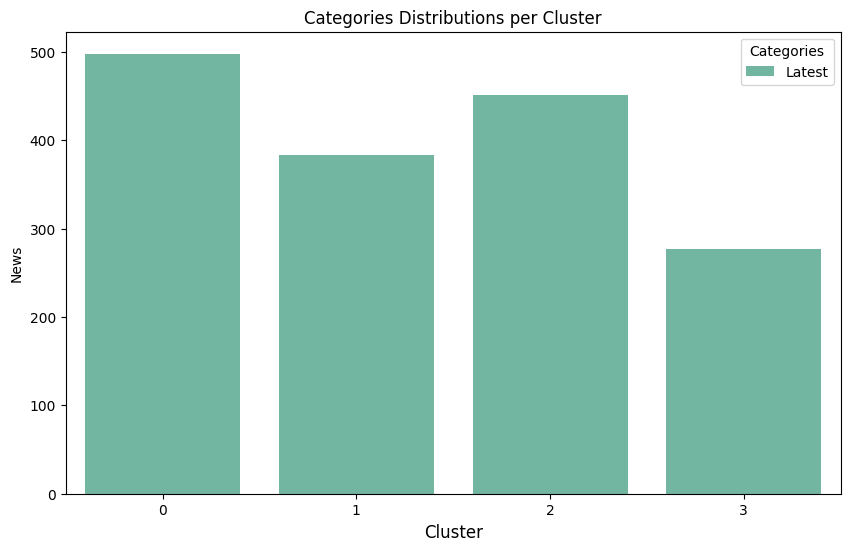

In [16]:
plot_clusters_distribution(dataframe)

### Main texts in clusters

Cluster =  0


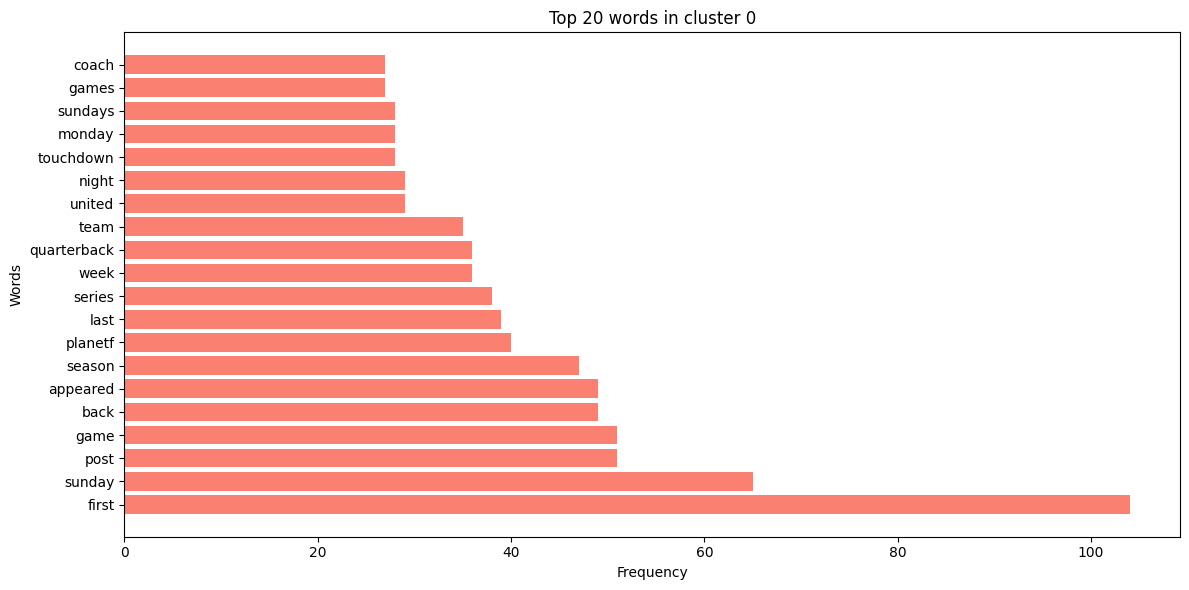

Cluster =  1


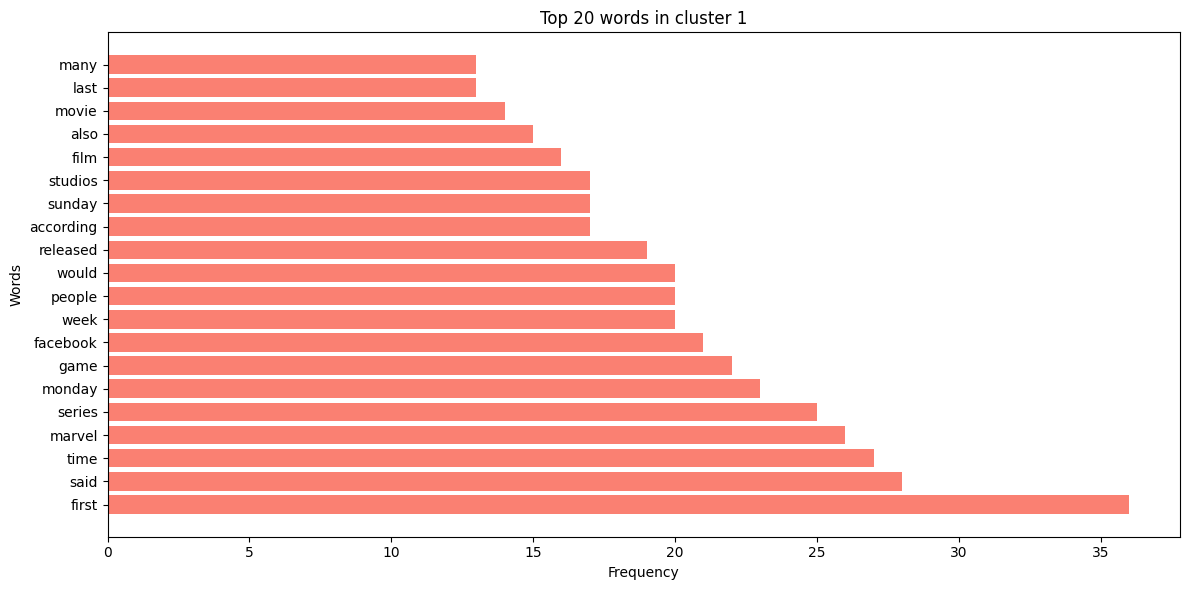

Cluster =  2


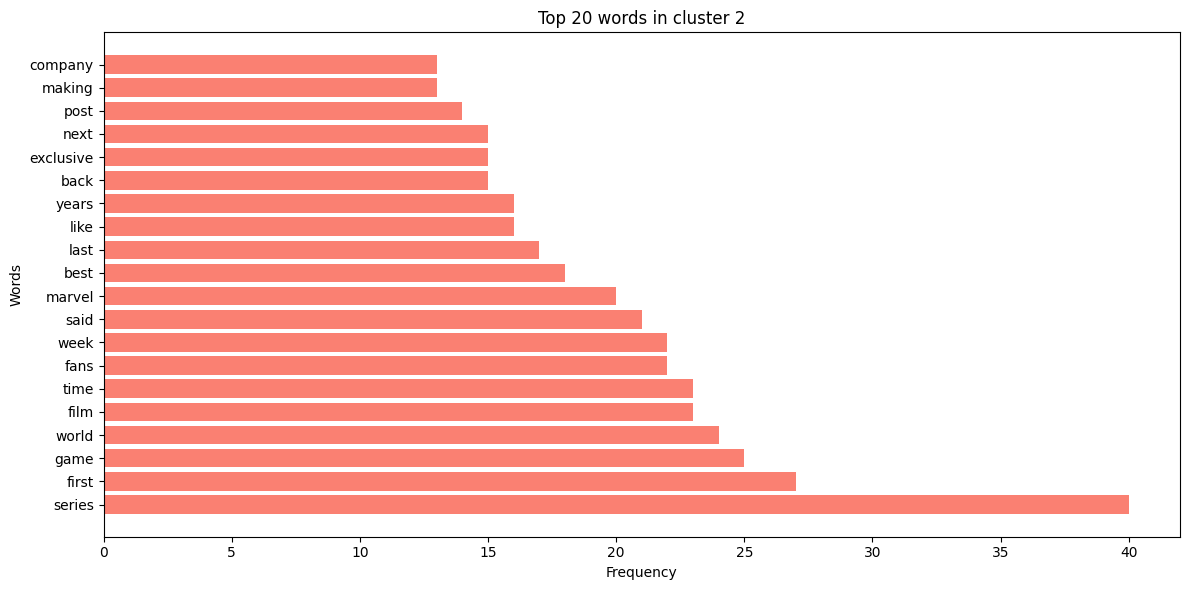

Cluster =  3


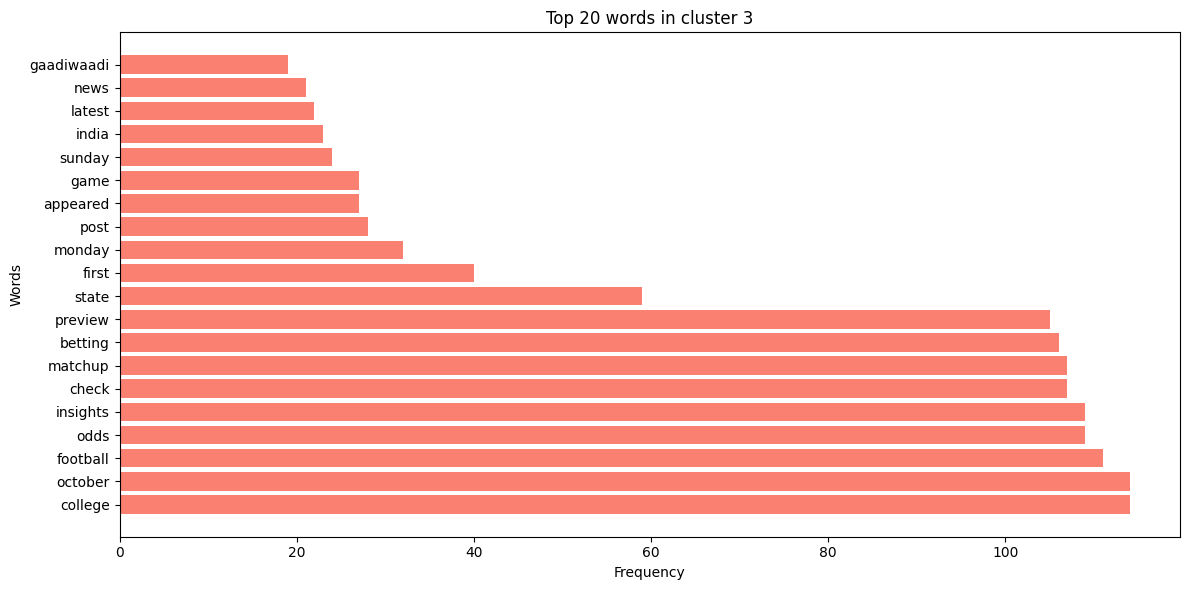

In [19]:
for cluster in np.unique(labels):
    print('Cluster = ', cluster)
    df_filtered = dataframe[(dataframe['cluster'] == cluster) & (dataframe['silhouette_sample'] > 0)].copy()    
    generate_words_frequency(df_filtered, cluster, 'cleaned_description')

Cluster =  0


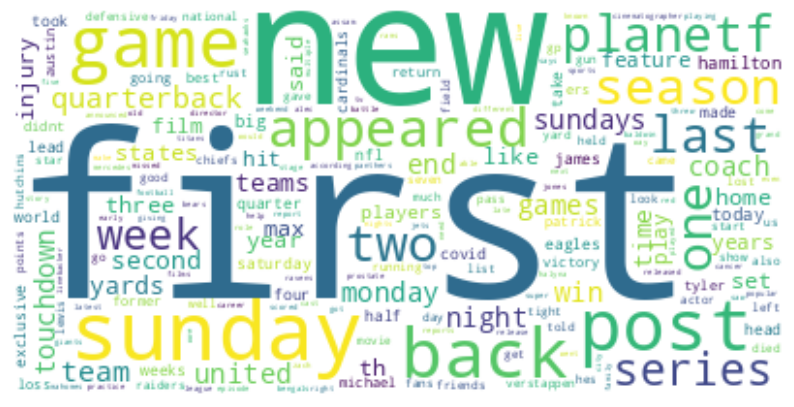

Cluster =  1


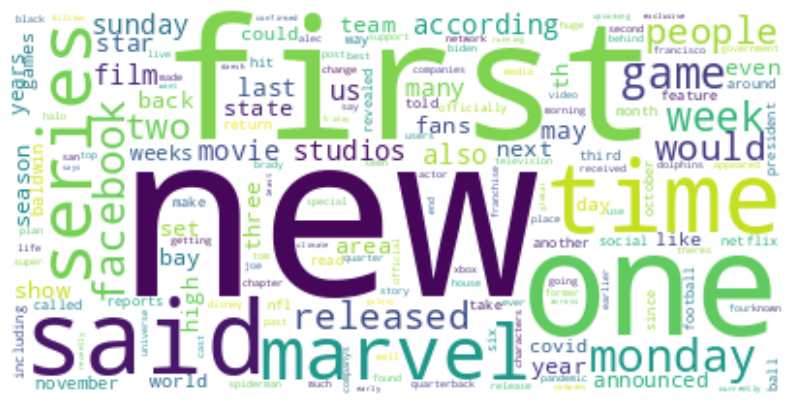

Cluster =  2


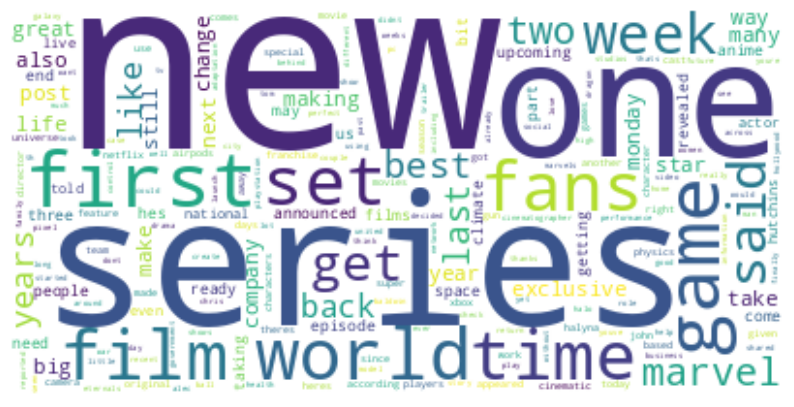

Cluster =  3


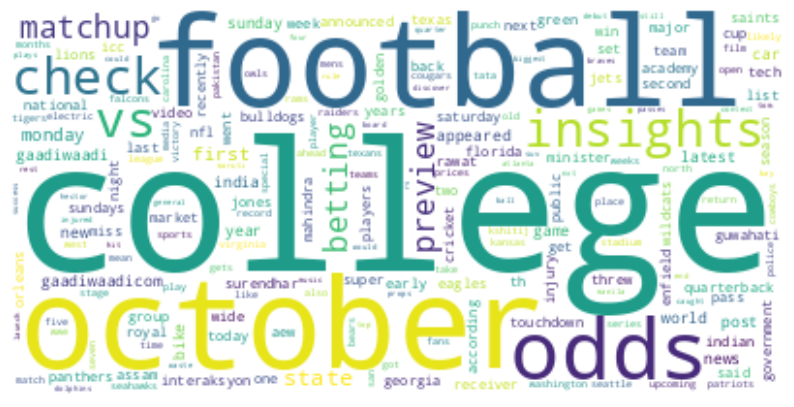

In [20]:
for cluster in np.unique(labels):
    print('Cluster = ', cluster)
    df_filtered = dataframe[(dataframe['cluster'] == cluster) & (dataframe['silhouette_sample'] > 0)].copy()
    plot_word_cloud(df_filtered, 'cleaned_description')    

### Similar texts between clusters

In [21]:
cluster = 3
cluster_df = dataframe[dataframe['cluster'] == cluster].copy()
cluster_df = cluster_df.reset_index(drop=True)

cluster_df[['title', 'Category']].head(10)

title  \
0  Assam Police Arrests Student Involved In Dibrugarh Gang Rape Case, Other Two Absconding   
1                                   Honda Electric Scooter For India To Launch Next Fiscal   
2                                                                           Ajax crush PSV   
3                            No quarantine for fully vaccinated players at Australian Open   
4                                          World medallists Manju, Jamuna storm into semis   
5                   Team was jaded after hectic IPL; long break will help immensely: Kohli   
6                                Manipur bids adieu to Swarnim Vijay Mashaal Victory Flame   
7                  Nehru Yuva Kendra Sangathan Meghalaya organizes 'Clean India Programme'   
8                       Khasi film Iewduh receives two awards at 67th National Film Awards   
9                           Upcoming 7-Seater Cars Launching In India In Next 12-18 Months   

  Category  
0   Latest  
1   Latest  
2   Latest  
3   Latest  
4   Latest  
5   Latest  
6   Latest  
7   Latest  
8   Latest  
9   Latest

In [22]:
idx_1 = 20
idx_2 = 12

desc_1 = cluster_df.loc[idx_1, 'title']
desc_2 = cluster_df.loc[idx_2, 'title']

print(desc_1[0:1000])
print('\n')
print(desc_2[0:1000])

ratio = lev.ratio(desc_1, desc_2)
print('\n')
print("Similaridade leveinstein entre as descrições =  ", np.around(ratio, 3))
print('\n')

Kentucky vs. Mississippi State College Football Odds, Plays and Insights


Dhubri Deputy Commissioner shifts Harijan families of DMCH complex


Similaridade leveinstein entre as descrições =   0.29


